# Evaluation Current Process

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import sys
sys.path.append( './helper/' )
from XperimentPlotter import XperimentPlotter
from Colormap import Colormap

2024-01-23 15:43:53.051009: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-23 15:43:53.083506: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-23 15:43:53.083537: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-23 15:43:53.084549: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-23 15:43:53.089995: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-23 15:43:53.090450: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
plt.rcParams['text.usetex'] = True
baseFigurePath = './tmp/figures'

In [3]:
path = '../data/029linearizationViewpixx3D/'
data = XperimentPlotter.ReadData(f'{path}/Test01/', '029 Test9 (nm, random), gamma=1.0', ['2023-11-22 09:57', '2023-11-22 20:12'])
path_temps = f'{path}/Test01'
data_linear = XperimentPlotter.mergeTempsInData(data, path_temps).dataframe
data_linear = data_linear.sort_values(by='levels')

/home/jonas/Documents/GithubRepo/code/./helper/Thermometer.py:33: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  traw = pd.read_csv(filename, header=None, sep=' ', skiprows=lambda i: 1 - i % 2, engine='c') # even lines from viewpixx


In [4]:
min = data_linear['mean'].head(3).mean()
max = data_linear['mean'].tail(3).mean()
perfect_linear = np.linspace(min, max, len(data_linear['levels']))


## Figure 3.1 & 3.2

/tmp/ipykernel_134483/3019022314.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


mean: -0.3229534951473503
std: 0.2586476650370908
omega um 0.67 herum: 0.2640704922097194


/tmp/ipykernel_134483/3019022314.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


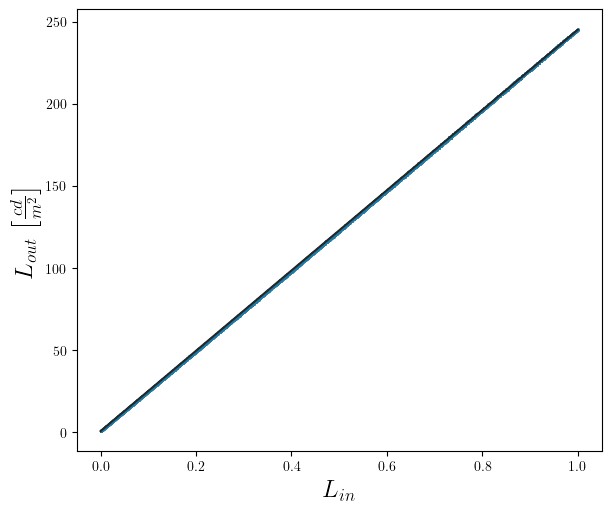

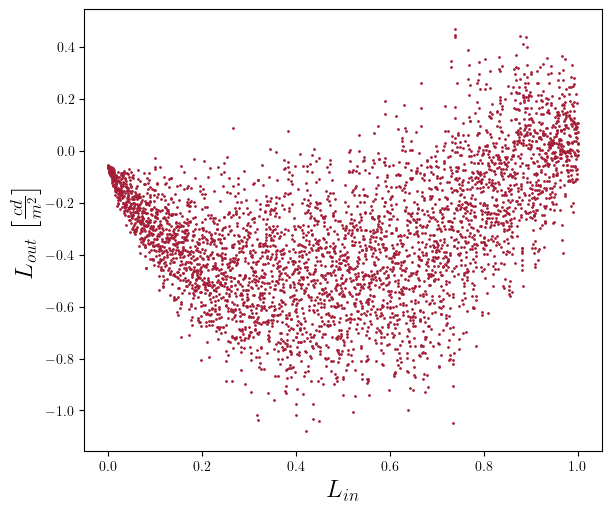

In [5]:
fontsize = 18
path = '02CurrentStatus/LinearizationCurrent'


# first graph (figure 3.2)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,5), layout='constrained')
axes.plot(data_linear['levels'], perfect_linear, color=Colormap.black)
axes.scatter(data_linear['levels'],data_linear['mean'], s=1, color=Colormap.map[1])

axes.set_xlabel(r'$L_{in}$', fontsize=fontsize)
axes.set_ylabel(r'$L_{out}$ $\left[\frac{cd}{m^2}\right]$', fontsize=fontsize)
figurePath = f'{baseFigurePath}/{path}_A.png'
fig.show()
fig.savefig(figurePath, dpi=300)


# second graph (figure 3.1)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,5), layout='constrained')
axes.scatter(data_linear['levels'], data_linear['mean']-perfect_linear, s=1, c=Colormap.map[0])
print(f'mean: {(data_linear["mean"]-perfect_linear).mean()}\nstd: {(data_linear["mean"]-perfect_linear).std()}')

print(f'omega um 0.67 herum: {(data_linear["mean"]-perfect_linear)[(data_linear["levels"] >= 0.66) & (data_linear["levels"] <= 0.68)].std()}')

axes.set_xlabel(r'$L_{in}$', fontsize=fontsize)
axes.set_ylabel(r'$L_{out}$ $\left[\frac{cd}{m^2}\right]$', fontsize=fontsize)
figurePath = f'{baseFigurePath}/{path}_B.png'
fig.show()
fig.savefig(figurePath, dpi=300)